In [1]:
import torch
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import DBSCAN,KMeans
from sklearn.neighbors import NearestNeighbors

from tqdm import tqdm

from torch.utils.tensorboard import SummaryWriter

In [2]:
data_dir = '2021-07-19'

In [3]:
all_metadata = pd.read_csv(f"{data_dir}/metadata.csv",low_memory=False)

In [4]:
texts = all_metadata['title'].to_list()+all_metadata['abstract'].to_list()

In [5]:
texts = list(filter(lambda x : not pd.isna(x) ,texts))

In [6]:
vectorizer = CountVectorizer(min_df=500,max_df=0.25,stop_words='english')
X = vectorizer.fit_transform(texts)

In [7]:
word_cnt = np.array(X.sum(0)).flatten()

In [8]:
word_cnt = sorted(dict(zip(vectorizer.get_feature_names(),word_cnt)).items(),key=lambda x:x[1],reverse=True)

c:\users\86187\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
word_cnt = list(filter(lambda x:len(x[0])>4,word_cnt))

In [10]:
words = list(map(lambda x:x[0],word_cnt))

In [11]:
from nltk.corpus import wordnet as wn

In [12]:
nouns = []
for w in words:
    try:
        syn = wn.synsets(w)
        if type(syn) == type([]):
            flag = syn[0].pos()=='n'
        else:
            flag = syn.pos()=='n'
    except:
        print(w)
    if flag:
        nouns.append(w)

coronavirus
versus
telemedicine
multi
comorbidities
vitro
coronaviruses
laparoscopic
telehealth
pubmed
nucleic
dataset
covid19
biomarkers
genomic
remdesivir
socio
pandemia
burnout
multivariable
tocilizumab
embase
frontline
psychosocial
seroprevalence
datasets
cochrane
multicenter
multidisciplinary
infectivity
hubei
nucleocapsid
tmprss2
mellitus
thrombotic
silico
pacientes
pathophysiology
comorbidity
intra
repurposing
opioid
endovascular
nanoparticles
sociodemographic
prospectively
extracorporeal
perioperative
clinicaltrials
scoping
lopinavir
multisystem
scopus
syncytial
biomarker
interquartile
entre
microbiota
pneumoniae
policymakers
sobre
mitochondrial
autophagy
intraoperative
preterm
interventional
coagulopathy
univariate
immunomodulatory
keywords
dehydrogenase
smartphone
troponin
whilst
transmembrane
salud
transcriptional
saúde
prrsv
pathogenicity
microbiome
thromboembolic
embolization
creatinine
transmissibility
crispr
bariatric
hypoxemia
psycinfo
favipiravir
aureus
casos
kawasaki


In [13]:
len(nouns)

4851

In [14]:
nouns

['patients',
 'pandemic',
 'study',
 'health',
 'disease',
 'results',
 'coronavirus',
 'infection',
 'using',
 'virus',
 'methods',
 'analysis',
 'treatment',
 'cases',
 'acute',
 'studies',
 'patient',
 'model',
 'social',
 'group',
 'review',
 'research',
 'impact',
 'hospital',
 'mortality',
 'positive',
 'public',
 'human',
 'control',
 'syndrome',
 'potential',
 'factors',
 'medical',
 'response',
 'symptoms',
 'years',
 'cells',
 'number',
 'background',
 'outcomes',
 'population',
 'protein',
 'management',
 'effects',
 'measures',
 'levels',
 'conclusions',
 'people',
 'development',
 'information',
 'findings',
 'evidence',
 'children',
 'novel',
 'level',
 'total',
 'current',
 'healthcare',
 'vaccine',
 'conclusion',
 'specific',
 'outbreak',
 'transmission',
 'infections',
 'participants',
 'countries',
 'diseases',
 'spread',
 'support',
 'present',
 'cancer',
 'period',
 'world',
 'effect',
 'learning',
 'approach',
 'groups',
 'changes',
 'testing',
 'immune',
 'activit

In [15]:
# nouns = list(map(lambda x : wn.synsets(x)[0].pos()=='n' if type(wn.synsets(x)) == type([]) else wn.synsets(x).pos()=='n', words))

In [15]:
def scibert():
    tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
    model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased")
    return tokenizer,model

In [16]:
tokenizer,model = scibert()
model.cuda()
model.eval()

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(31090, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [17]:
with torch.no_grad():
    results = []
    for w in tqdm(nouns):
        inputs = tokenizer([w], padding=False, truncation=False, return_tensors="pt",add_special_tokens=False)
        input_ids = inputs['input_ids'].cuda()
        token_type_ids = inputs['token_type_ids'].cuda()
        attention_mask = inputs['attention_mask'].cuda()
        out = model(input_ids = input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask).last_hidden_state.mean(1)
#         print(out.shape)
        results.append(out)
results = torch.cat(results,dim=0).cpu().numpy()

100%|█████████████████████████████████████████████████████████████████████████████| 4851/4851 [00:42<00:00, 115.01it/s]


In [18]:
X_tsne = TSNE(n_components=2,perplexity=18,learning_rate=10,metric='cosine',n_iter=500,n_jobs=-1,random_state=29).fit_transform(results) 

c:\users\86187\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\users\86187\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


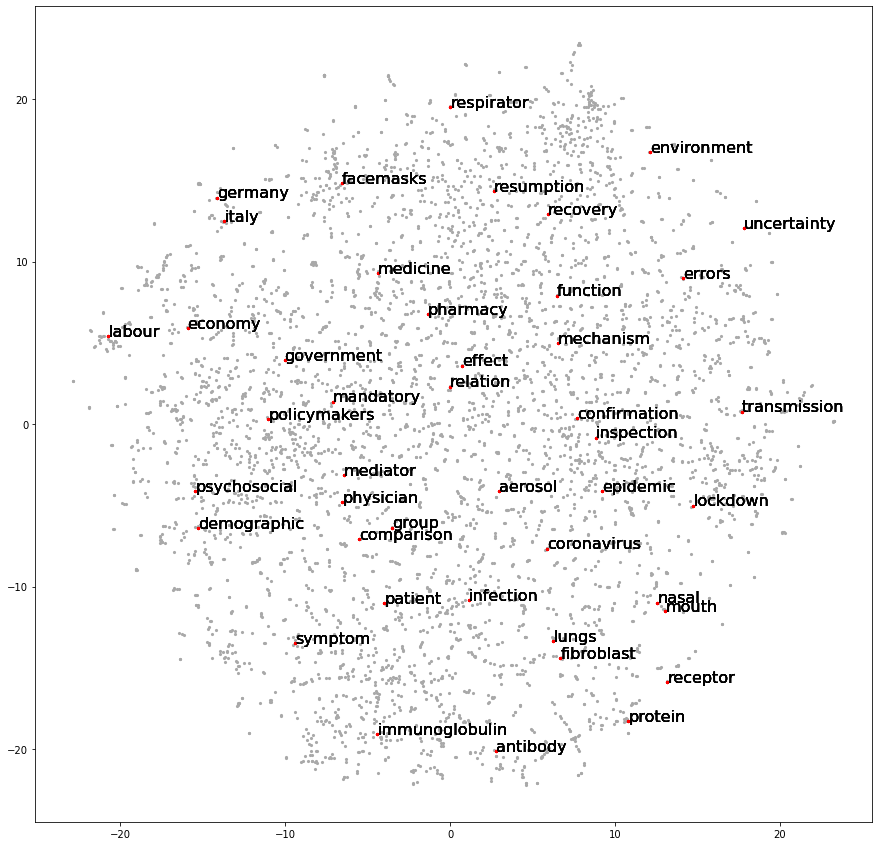

In [26]:
plt.figure(figsize=(15,15))
cords = X_tsne
x,y = cords[:,0],cords[:,1]
plt.scatter(x,y,marker='o', c='darkgrey',linewidths=0,s=10)

for fontsize in [14, 15, 16,17,18]:
    show_words = ['facemasks','respirator','infection','epidemic','pharmacy','medicine','policymakers','government',
                  'economy','labour','antibody','immunoglobulin','demographic','patient','psychosocial',
                  'symptom','function','mechanism','transmission',
                  'uncertainty','errors','lockdown','effect','comparison','group',
                 'environment','mandatory','relation','resumption','recovery',
                 'protein','receptor','aerosol','italy','germany',
                 'mouth','nasal','fibroblast','lungs','coronavirus','confirmation','inspection','physician','mediator',
    #               'explanation','reason',
                 ]
    #     'treatment','etiology','restriction','strategy',
    for idx, word in enumerate(nouns):
        if word in show_words:
            plt.scatter(x[idx],y[idx],marker='o', c='red',linewidths=0,s=10)
            plt.text(x[idx],y[idx],word,fontsize=16)
    # for i in range(-20,20):
    #     plt.plot([i,i],[-20,20])
    #     plt.plot([-20,20],[i,i])
    plt.savefig(f'word_case/29_v2_{fontsize}.svg')
    # plt.show()

In [20]:
# a = np.arange(X_tsne.shape[0])[np.all([X_tsne[:,0]>=-7,X_tsne[:,1]<=-1,X_tsne[:,0]<=-2,X_tsne[:,1]>=-4],axis=0)]

In [21]:
# for i in a:
#     print(nouns[i])